In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline
from sklearn.model_selection import train_test_split

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
import os
os.getcwd()


'C:\\Users\\logesh\\Documents\\OneDrive-2019-07-22\\Text Analytics'

In [6]:
os.chdir('F:\\DS\\KAGGLE\\2nd set\\heart-disease-uci')

In [8]:
data=pd.read_csv('heart.csv')

In [10]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [44]:
data.corr().to_csv('cor1.csv')

In [12]:
x=data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [13]:
y=data[['target']]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.7, random_state=100)

C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 

from sklearn.metrics import accuracy_score

In [25]:
classifiers=[KNeighborsClassifier(3),
            SVC(probability=True),
            DecisionTreeClassifier(),
            RandomForestClassifier(n_estimators=100,max_features=3),
            AdaBoostClassifier(),
            GradientBoostingClassifier(),
           GaussianNB(),
           LogisticRegression(),
           LinearDiscriminantAnalysis(),
           QuadraticDiscriminantAnalysis()]

In [26]:
log=["classifier","Accuracy"]
log_status=pd.DataFrame(columns=log)

In [36]:
log_status.head(12)

,classifier,Accuracy
0,KNeighborsClassifier,6.193548
1,SVC,5.516129
2,DecisionTreeClassifier,7.548387
3,RandomForestClassifier,8.225806
4,AdaBoostClassifier,7.870968
5,GradientBoostingClassifier,7.774194
6,GaussianNB,8.483871
7,LogisticRegression,8.483871
8,LinearDiscriminantAnalysis,8.451613
9,QuadraticDiscriminantAnalysis,8.000000


In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
acc_dict={}
sss=StratifiedShuffleSplit(n_splits=10, train_size=0.7, random_state=100)
for train_index, test_index in sss.split(x,y):
    x_train, x_test= x.iloc[train_index], x.iloc[test_index]
    y_train, y_test=y.iloc[train_index], y.iloc[test_index]
    for clf in classifiers:
        name=clf.__class__.__name__
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc=accuracy_score(y_test,pred)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc
    

C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1788: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\logesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avo

C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarn

C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarn

C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarn

In [34]:
log_status['classifier']=acc_dict.keys()
log_status['Accuracy']=acc_dict.values()

In [37]:
log_status.set_index([[0,1,2,3,4,5,6,7,8,9]])

,classifier,Accuracy
0,KNeighborsClassifier,6.193548
1,SVC,5.516129
2,DecisionTreeClassifier,7.548387
3,RandomForestClassifier,8.225806
4,AdaBoostClassifier,7.870968
5,GradientBoostingClassifier,7.774194
6,GaussianNB,8.483871
7,LogisticRegression,8.483871
8,LinearDiscriminantAnalysis,8.451613
9,QuadraticDiscriminantAnalysis,8.000000


Text(0.5, 1.0, 'Classifier Accuracy')

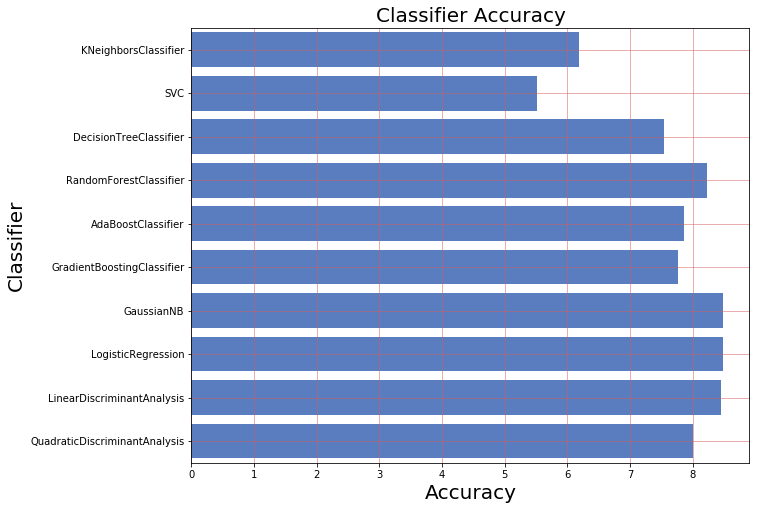

In [41]:
import seaborn as sns
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='classifier',x='Accuracy',data=log_status,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

In [45]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\logesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
y_pred=lr.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8064516129032258
